# Problem 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import itertools

df = pd.read_csv('OneDrive/Homework1/bmi_study.csv')
print(df.head())

X = df[['id', 'sex', 'age', 'bmi', 'smoking', 'ecog', 'histop']]
y = df['infection']
X.head()

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


   id sex  age    bmi  ecog  smoking     operation                   histop  \
0   1   F   66  18.38     0        0         other           adenocarcinoma   
1   2   F   58  16.89     0        1  lobe removed           adenocarcinoma   
2   3   F   54  14.84     0        1  lobe removed           adenocarcinoma   
3   4   F   69  16.89     0        1         other  squamous cell carcinoma   
4   5   F   72  46.25     0        1  lobe removed           adenocarcinoma   

   infection  complication  hospstay  
0          0             0        10  
1          0             0         8  
2          0             0         5  
3          0             1        13  
4          0             0         7  


,id,sex,age,bmi,smoking,ecog,histop
0,1,F,66,18.38,0,0,adenocarcinoma
1,2,F,58,16.89,1,0,adenocarcinoma
2,3,F,54,14.84,1,0,adenocarcinoma
3,4,F,69,16.89,1,0,squamous cell carcinoma
4,5,F,72,46.25,1,0,adenocarcinoma


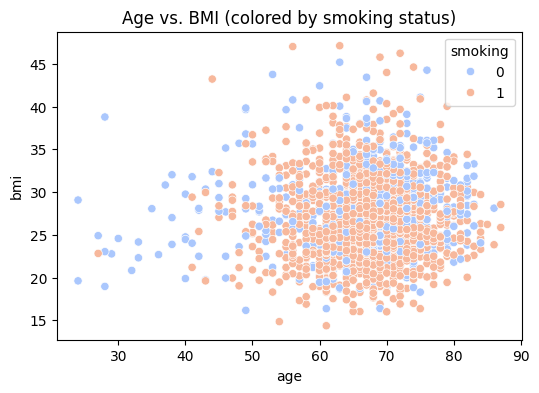

In [4]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='age', y='bmi', hue='smoking', data=df, palette='coolwarm')
plt.title("Age vs. BMI (colored by smoking status)")
plt.show()


In [5]:

model = smf.glm(formula='infection ~ sex + age + bmi + smoking + ecog + histop', data=df, family=sm.families.Binomial())
result = model.fit()
print(result.summary())
predictions = result.predict()
print(predictions)
print(f"Model AIC: {result.aic}")

                 Generalized Linear Model Regression Results                  
Dep. Variable:              infection   No. Observations:                 1902
Model:                            GLM   Df Residuals:                     1894
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -163.11
Date:                Fri, 07 Mar 2025   Deviance:                       326.22
Time:                        19:53:16   Pearson chi2:                 2.70e+03
No. Iterations:                     8   Pseudo R-squ. (CS):            0.01192
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [ ]:


predictors = ['sex', 'age', 'bmi', 'smoking', 'ecog', 'histop']

best_aic = np.inf
best_formula = None
best_model = None

for k in range(1, len(predictors) + 1):
    for subset in itertools.combinations(predictors, k):
        main_formula = "infection ~ " + " + ".join(subset)
        try:
            model = smf.glm(formula=main_formula, data=df, family=sm.families.Binomial()).fit()
            if model.aic < best_aic:
                print("New best model found!")
                print("AIC:", model.aic)
                print("Formula:", main_formula)
                best_aic = model.aic
                best_formula = main_formula
                best_model = model
        except Exception as e:
            pass

        pairs = list(itertools.combinations(subset, 2))
        for i in range(1, len(pairs) + 1):
            for interaction_subset in itertools.combinations(pairs, i):
                interaction_terms = ["{}:{}".format(pair[0], pair[1]) for pair in interaction_subset]
                formula_with_interactions = main_formula + " + " + " + ".join(interaction_terms)
                try:
                    model_int = smf.glm(formula=formula_with_interactions, data=df, 
                                        family=sm.families.Binomial()).fit()
                    if model_int.aic < best_aic:
                        best_aic = model_int.aic
                        best_formula = formula_with_interactions
                        best_model = model_int
                except Exception as e:
                    pass

print("Best Model:", best_formula)
print("AIC:", best_aic)


Best Model: infection ~ sex + bmi + smoking + bmi:smoking
AIC: 327.1390388131937


- smokers have a higher probability of infection than non-smokers
- histop - remove since it is not significant in the model
- age not significant
- bmi not significant
- ecog not significant

In [6]:
model = smf.glm(formula='infection ~ sex + bmi + smoking', data=df, family=sm.families.Binomial())
result = model.fit()
print(result.summary())
predictions = result.predict()
print(predictions)
print(f"Model AIC: {result.aic}")

                 Generalized Linear Model Regression Results                  
Dep. Variable:              infection   No. Observations:                 1902
Model:                            GLM   Df Residuals:                     1898
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -163.61
Date:                Fri, 07 Mar 2025   Deviance:                       327.22
Time:                        19:53:21   Pearson chi2:                 2.63e+03
No. Iterations:                     8   Pseudo R-squ. (CS):            0.01140
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.7161      1.294     -2.871      0.0


Coefficient estimates with 95% Confidence Intervals:
           Estimate      2.5%     97.5%
Intercept -3.716070 -6.253105 -1.179035
sex[T.M]   0.863393  0.092444  1.634342
bmi       -0.086848 -0.167215 -0.006481
smoking    1.722245  0.285036  3.159454
       mean   mean_se  mean_ci_lower  mean_ci_upper
0  0.037653  0.019794       0.013234       0.102449
1  0.036625  0.018903       0.013129       0.097997
2  0.035624  0.018049       0.013020       0.093742
3  0.034650  0.017230       0.012909       0.089677
4  0.033701  0.016447       0.012795       0.085796


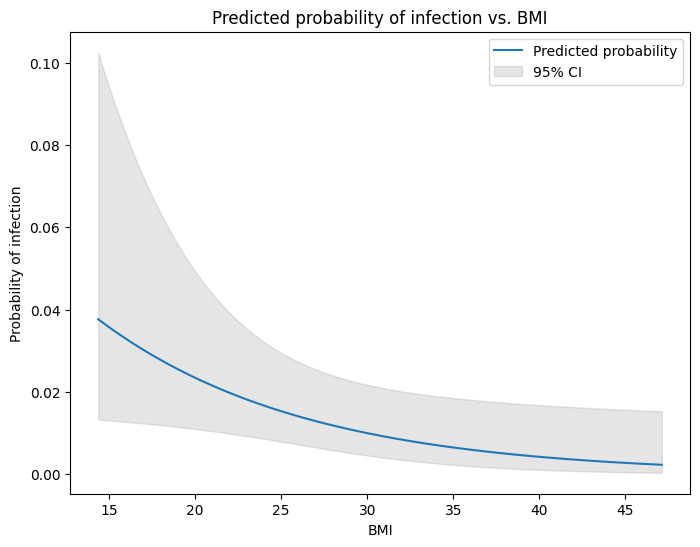

In [7]:
# Create a summary table with estimates and 95% confidence intervals
conf_int = result.conf_int()
conf_int.columns = ['2.5%', '97.5%']
params = result.params
summary_table = pd.concat([params, conf_int], axis=1)
summary_table.columns = ['Estimate', '2.5%', '97.5%']
print("\nCoefficient estimates with 95% Confidence Intervals:")
print(summary_table)


bmi_range = np.linspace(df['bmi'].min(), df['bmi'].max(), 100)
new_data = pd.DataFrame({
    'bmi': bmi_range,
    'sex': 'F',
    'smoking': 1,
})

predictions = result.get_prediction(new_data)
pred_summary = predictions.summary_frame(alpha=0.05)
print(pred_summary.head())
# Plot the predicted probability of infection versus BMI
plt.figure(figsize=(8, 6))
plt.plot(bmi_range, pred_summary['mean'], label='Predicted probability')
plt.fill_between(bmi_range, 
                 pred_summary['mean_ci_lower'], 
                 pred_summary['mean_ci_upper'], 
                 color='gray', alpha=0.2, label='95% CI')
plt.xlabel('BMI')
plt.ylabel('Probability of infection')
plt.title('Predicted probability of infection vs. BMI')
plt.legend()
plt.show()

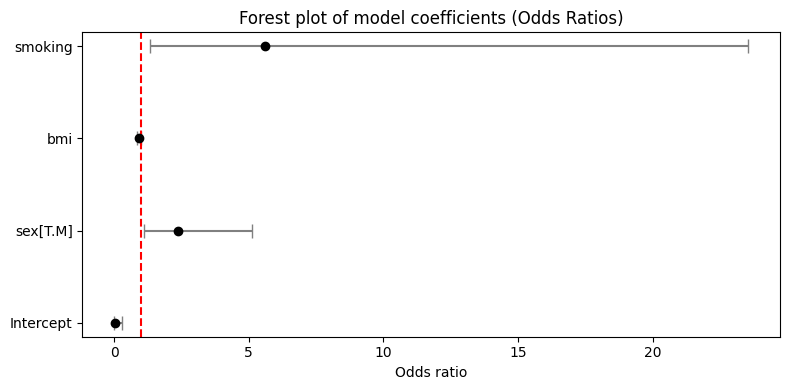

In [8]:

odds_ratios = np.exp(summary_table['Estimate'])
ci_lower = np.exp(summary_table['2.5%'])
ci_upper = np.exp(summary_table['97.5%'])
variables = summary_table.index

plt.figure(figsize=(8, 4))
plt.errorbar(odds_ratios, variables, 
             xerr=[odds_ratios - ci_lower, ci_upper - odds_ratios], 
             fmt='o', color='black', ecolor='gray', capsize=5)
plt.axvline(x=1, linestyle='--', color='red')
plt.xlabel('Odds ratio')
plt.title('Forest plot of model coefficients (Odds Ratios)')
plt.tight_layout()
plt.show()


BMI there is a small but statistically significant relationship between BMI and the change of infection. Higher BMI is associated with slightly lower risk of infection.
Smoking has huge imapct on infection risk. Smokers are at on average 5.6 times higher risk of infection than non-smokers. Males are more likely to be infected more than females.

# Problem 2

/opt/homebrew/Caskroom/miniconda/base/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


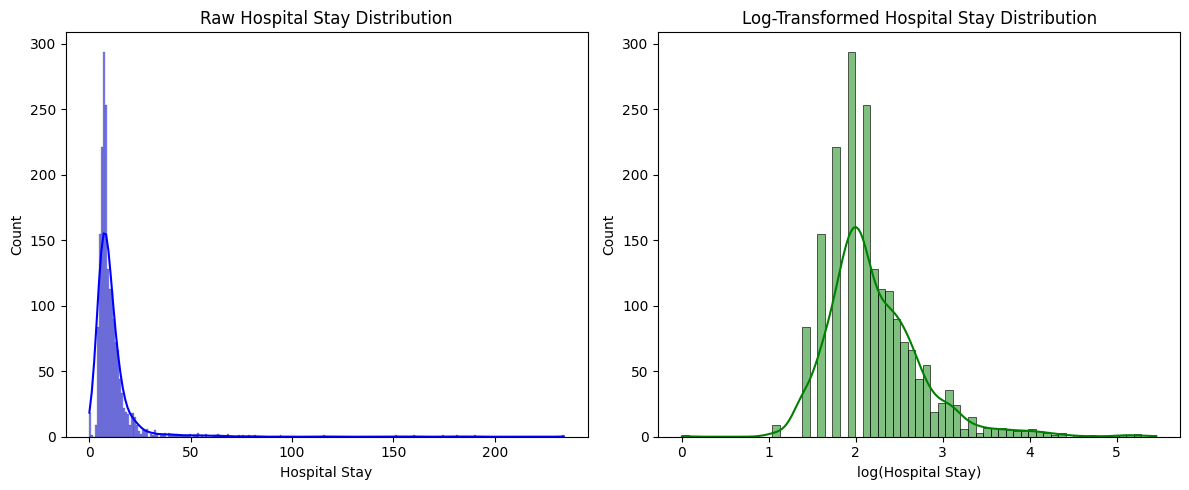

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df["log_hospstay"] = np.log(df["hospstay"])

sns.histplot(df['hospstay'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Raw Hospital Stay Distribution')
axes[0].set_xlabel('Hospital Stay')
axes[0].set_ylabel('Count')

positive_stays = df['hospstay'][df['hospstay'] > 0]
sns.histplot(np.log(positive_stays), kde=True, ax=axes[1], color='green')
axes[1].set_title('Log-Transformed Hospital Stay Distribution')
axes[1].set_xlabel('log(Hospital Stay)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [10]:
print(df[df['hospstay'] <= 0])
df = df[df['hospstay'] > 0]



        id sex  age    bmi  ecog  smoking     operation  \
366    367   F   77  28.76     1        1  lobe removed   
384    385   M   60  22.86     0        0  lobe removed   
488    489   M   62  24.17     0        1  lobe removed   
790    791   M   69  26.40     0        1         other   
866    867   M   71  26.49     0        1         other   
887    888   M   64  24.39     0        0  lobe removed   
1024  1025   M   73  22.94     0        1  lobe removed   
1045  1046   M   70  25.69     0        1  lobe removed   
1074  1075   F   60  35.15     0        1  lobe removed   
1125  1126   F   66  27.64     0        1  lobe removed   
1143  1144   F   64  30.86     0        1  lobe removed   
1162  1163   M   72  27.34     0        0  lobe removed   
1214  1215   M   55  27.36     0        0  lobe removed   
1463  1464   M   65  29.07     0        1  lobe removed   
1464  1465   M   58  28.41     0        1  lobe removed   
1509  1510   M   71  30.81     0        1  lobe removed 

In [17]:
predictors = ['sex', 'age', 'bmi', 'smoking', 'ecog', 'histop']

best_aic = np.inf
best_formula = None
best_model = None

for k in range(1, len(predictors) + 1):
    for subset in itertools.combinations(predictors, k):
        main_formula = "log_hospstay ~ " + " + ".join(subset)
        try:
            model = smf.glm(formula=main_formula, data=df, family=sm.families.Gaussian()).fit()
            if model.aic < best_aic:
                print("New best model found!")
                print("AIC:", model.aic)
                print("Formula:", main_formula)
                best_aic = model.aic
                best_formula = main_formula
                best_model = model
        except Exception as e:
            pass

        pairs = list(itertools.combinations(subset, 2))
        for i in range(1, len(pairs) + 1):
            for interaction_subset in itertools.combinations(pairs, i):
                interaction_terms = ["{}:{}".format(pair[0], pair[1]) for pair in interaction_subset]
                formula_with_interactions = main_formula + " + " + " + ".join(interaction_terms)
                try:
                    model_int = smf.glm(formula=formula_with_interactions, data=df, 
                                        family=sm.families.Gaussian()).fit()
                    if model_int.aic < best_aic:
                        best_aic = model_int.aic
                        best_formula = formula_with_interactions
                        best_model = model_int
                except Exception as e:
                    pass

print("Best Model:", best_formula)
print("AIC:", best_aic)

New best model found!
AIC: 3048.233768184389
Formula: log_hospstay ~ sex
New best model found!
AIC: 3041.8292246841615
Formula: log_hospstay ~ sex + age
New best model found!
AIC: 3034.93263690724
Formula: log_hospstay ~ sex + ecog
New best model found!
AIC: 3028.157722783917
Formula: log_hospstay ~ sex + age + ecog
New best model found!
AIC: 3023.516737062556
Formula: log_hospstay ~ sex + age + bmi + ecog
Best Model: log_hospstay ~ sex + age + bmi + ecog
AIC: 3023.516737062556


In [24]:
model_hosp = smf.glm(formula='log_hospstay ~ sex + (age > 65) + bmi + C(ecog)',
                     data=df, 
                     family=sm.families.Gaussian(),
                     )
result_hosp = model_hosp.fit()
print(result_hosp.summary())
print(f"Model AIC: {result_hosp.aic}")


                 Generalized Linear Model Regression Results                  
Dep. Variable:           log_hospstay   No. Observations:                 1884
Model:                            GLM   Df Residuals:                     1878
Model Family:                Gaussian   Df Model:                            5
Link Function:               identity   Scale:                         0.28717
Method:                          IRLS   Log-Likelihood:                -1495.0
Date:                Fri, 07 Mar 2025   Deviance:                       539.31
Time:                        20:43:04   Pearson chi2:                     539.
No. Iterations:                     3   Pseudo R-squ. (CS):            0.03906
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.2452      0.073  

ECOG is the only factor with a statistically significant effect, suggesting that patients with higher ECOG scores have substantially longer hospital stays. The other variables—sex, tumor histology, and smoking—show some positive association with hospital stay but are not statistically conclusive.

In [25]:
coefs = result_hosp.params
conf = result_hosp.conf_int()
conf.columns = ['2.5%', '97.5%']
summary_table = pd.concat([coefs, conf], axis=1)
summary_table.rename(columns={0: 'coef'}, inplace=True)
print(summary_table)

                      coef      2.5%     97.5%
Intercept         2.245202  2.101412  2.388992
sex[T.M]          0.115435  0.066855  0.164016
age > 65[T.True]  0.088204  0.038217  0.138192
C(ecog)[T.1]      0.187331  0.125611  0.249052
C(ecog)[T.2]     -0.052031 -0.190483  0.086421
bmi              -0.006753 -0.011802 -0.001703


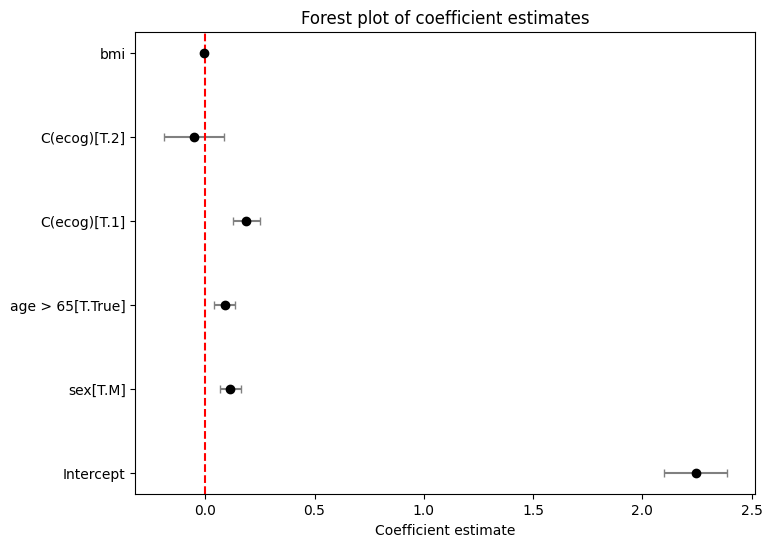

In [26]:

coefs = result_hosp.params
conf = result_hosp.conf_int()
variables = coefs.index

fig, ax = plt.subplots(figsize=(8, 6))
ax.errorbar(coefs, np.arange(len(coefs)), 
            xerr=[coefs - conf[0], conf[1] - coefs], 
            fmt='o', color='black', ecolor='gray', capsize=3)
ax.axvline(x=0, color='red', linestyle='--')
ax.set_yticks(np.arange(len(coefs)))
ax.set_yticklabels(variables)
ax.set_xlabel('Coefficient estimate')
ax.set_title('Forest plot of coefficient estimates')
plt.show()


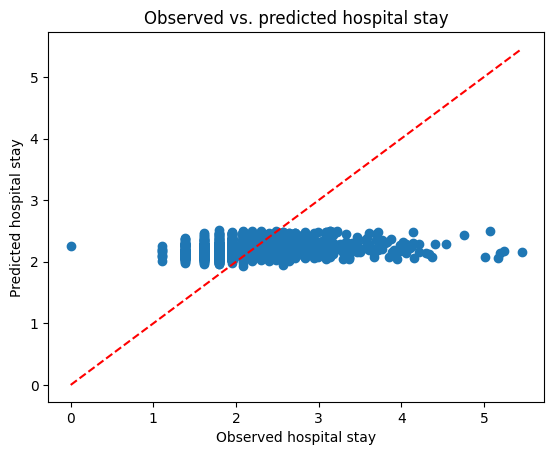

In [27]:
predicted = result_hosp.predict(df)
plt.scatter(df['log_hospstay'], (predicted))
plt.xlabel('Observed hospital stay')
plt.ylabel('Predicted hospital stay')
plt.title('Observed vs. predicted hospital stay')

# Plot a 45° reference line:
min_val = min(df['log_hospstay'].min(), predicted.min())
max_val = max(df['log_hospstay'].max(), predicted.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
plt.show()
